# 13.2.0 Perceptrón

**Perceptrón:** $\;$ versión determinista de regresión logística binaria
$$f(\boldsymbol{x};\boldsymbol{\theta})=\mathbb{I}(\boldsymbol{w}^t\boldsymbol{x}+b\geq 0)=H(\boldsymbol{w}^t\boldsymbol{x}+b)$$

**Libro Perceptrons:** $\;$ publicado en 1969 por Marvin Minsky y Seymour Papert, proporcionó numerosos ejemplos de problemas de clasificación que los perceptrones no resuelven

# 13.2.1 El problema XOR

## Problema XOR

Problema famoso del libro Perceptrons con datos 2d no linealmente separables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).astype(float)
y = np.array([0, 1, 1, 0]).astype(int)
print(np.c_[X, y])

[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


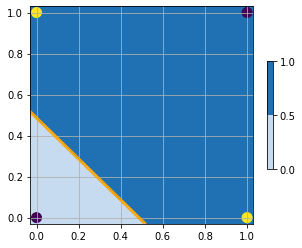

In [2]:
w = np.array([1, 1]); b = -0.5
P = lambda x: np.heaviside(w @ x + b, 0.0)
fig, ax = plt.subplots(1, 1, figsize=(5, 4)); ax.grid()
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
yy = np.apply_along_axis(P, 1, XX)
ax.contour(x1, x2, yy.reshape(x1.shape), 1, colors='orange', linestyles='solid')
cp = ax.contourf(x1, x2, yy.reshape(x1.shape), 1, cmap='Blues')
plt.colorbar(cp, ax=ax, shrink=0.5); ax.scatter(*X.T, c=y, s=100);

## Resolución de XOR con un MLP

XOR se resuelve con tres Perceptrones correspondientes a dos **unidades ocultas,** $h_1$ y $h_2$, y la salida $y$

In [3]:
import graphviz; graphviz.Source('''digraph { rankdir=BT
yb [label="1"] yb -> y [label="-0.5"] h1 -> y [label="-1"] h2 -> y [label="+1"]
h1b [label="1"] h1b -> h1 [label="-1.5"] x1 -> h1 [label="+1"] x2 -> h1 [label="+1"]
h2b [label="1"] h2b -> h2 [label="-0.5"] x1 -> h2 [label="+1"] x2 -> h2 [label="+1"]
}''').render(filename='13.2.1 MLPXOR', format='svg');

<div align="center">
<table><tr><td style="border: none;"><img src="13.2.1 MLPXOR.svg" width="350"/></td><td style="border: none;">

|$x_1$|$x_2$|$\boldsymbol{w}_1^t\boldsymbol{x}+b_1$|$h_1$|$\boldsymbol{w}_2^t\boldsymbol{x}+b_2$|$h_2$|$\boldsymbol{w}_y^t\boldsymbol{h}+b_y$|$y$|
|-----|-----|--------------------------------------|-----|--------------------------------------|-----|--------------------------------------|---|
| $0$ | $0$ |                               $-1.5$ | $0$ |                               $-0.5$ | $0$ |                               $-0.5$ |$0$|
| $0$ | $1$ |                               $-0.5$ | $0$ |                               $+0.5$ | $1$ |                               $+0.5$ |$1$|
| $1$ | $0$ |                               $-0.5$ | $0$ |                               $+0.5$ | $1$ |                               $+0.5$ |$1$|
| $1$ | $1$ |                               $+0.5$ | $1$ |                               $+1.5$ | $1$ |                               $-0.5$ |$0$|

$$y=\neg h_1\wedge h_2=\neg(x_1\wedge x_2)\wedge(x_1\vee x_2)$$

</td><tr></table>
</div>

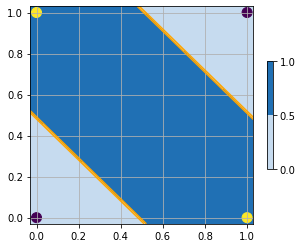

In [4]:
w1 = np.array([1, 1]); b1 = -1.5; w2 = np.array([1, 1]); b2 = -0.5; wy = np.array([-1, 1]); by = -0.5
P = lambda x, w, b: np.heaviside(w @ x + b, 0.0)
MLPXOR = lambda x: P(np.array([P(x, w1, b1), P(x, w2, b2)]), wy, by)
fig, ax = plt.subplots(1, 1, figsize=(5, 4)); ax.grid()
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
yy = np.apply_along_axis(MLPXOR, 1, XX)
ax.contour(x1, x2, yy.reshape(x1.shape), 1, colors='orange', linestyles='solid')
cp = ax.contourf(x1, x2, yy.reshape(x1.shape), 1, cmap='Blues')
plt.colorbar(cp, ax=ax, shrink=0.5); ax.scatter(*X.T, c=y, s=100);

# 13.2.2 MLPs diferenciables

**Función de activación:** $\;$ Heaviside no es diferenciable, por lo que se reemplaza por una función diferenciable, $\,\varphi:\mathbb{R}\to\mathbb{R}$

**Unidades ocultas de la capa $\ell$, $\boldsymbol{z}_{\ell}$:** $\;$ afinidad de las unidades ocultas de la capa $\ell-1$ transformada elementalmente por $\varphi$,
$$\boldsymbol{z}_{\ell}=f_{\ell}(\boldsymbol{z}_{\ell-1})=\varphi_{\ell}(\boldsymbol{b}_{\ell}+\mathbf{W}_{\ell}\boldsymbol{z}_{\ell-1})$$
En forma escalar, la unidad $k$ de la capa $\ell$ se define a partir de las $K_{\ell-1}$ unidades ocultas de la capa $\ell-1$ como:
$$z_{k\ell}=\varphi_{\ell}\left(b_{k\ell}+\sum_{j=1}^{K_{\ell-1}}w_{jk\ell}z_{j\ell-1}\right)$$

**Pre-activaciones de la capa $\ell$:** $\quad \boldsymbol{a}_{\ell}=\boldsymbol{b}_{\ell}+\mathbf{W}_{\ell}\boldsymbol{z}_{\ell-1},\,$ por lo que $\,\boldsymbol{z}_{\ell}=f_{\ell}(\boldsymbol{z}_{\ell-1})=\varphi_{\ell}(\boldsymbol{a}_{\ell})$

**MLPs diferenciables:** $\;$ composiciones de capas con funciones diferenciables, mucho más usados que los MLPs históricos (con Heaviside)

# 13.2.3 Funciones de activación

## Lineales

Si $\varphi(a)=c_{\ell}a$, el modelo completo es lineal pues toda composición de capas lineales sucesivas se reduce a una sola capa lineal
$$\begin{align*}
f(\boldsymbol{x};\boldsymbol{\theta})%
&=c_L\mathbf{W}_L(c_{L-1}\mathbf{W}_{L-1}(\cdots(c_1\mathbf{W}_1\boldsymbol{x})\cdots))%
&&\text{con}\;\mathbf{W}_\ell\in\mathbb{R}^{K_\ell\times K_{\ell-1}},\,K_0=D,\,\boldsymbol{x}\in\mathbb{R}^{D\times 1}\\%
&=\tilde{\mathbf{W}}_L\tilde{\mathbf{W}}_{L-1}\cdots\tilde{\mathbf{W}}_1\boldsymbol{x}%
&&\text{con}\;\tilde{\mathbf{W}}_\ell=c_\ell\mathbf{W}_\ell\\%
&=\tilde{\mathbf{W}}\boldsymbol{x}%
&&\text{con}\;\tilde{\mathbf{W}}=\tilde{\mathbf{W}}_L\tilde{\mathbf{W}}_{L-1}\cdots\tilde{\mathbf{W}}_1
\end{align*}$$

## Funciones sigmoide (logística) y tanh

Antes populares, **saturan** a $(0,1)$ y $(-1,1)$, lo que causa el **vanishing gradient problem** (gradientes muy pequeños)

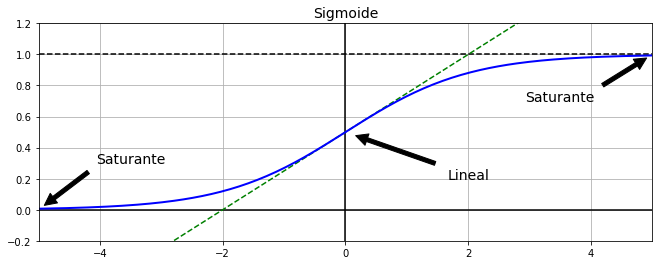

In [1]:
import numpy as np; import matplotlib.pyplot as plt; a = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4)); plt.grid(True); plt.axis([-5, 5, -0.2, 1.2]); 
plt.plot([-5, 5], [0, 0], 'k-'); plt.plot([-5, 5], [1, 1], 'k--'); plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--'); plt.plot(a, 1 / (1 + np.exp(-a)), "b-", linewidth=2);
plt.title("Sigmoide", fontsize=14); props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturante', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturante', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Lineal', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center");

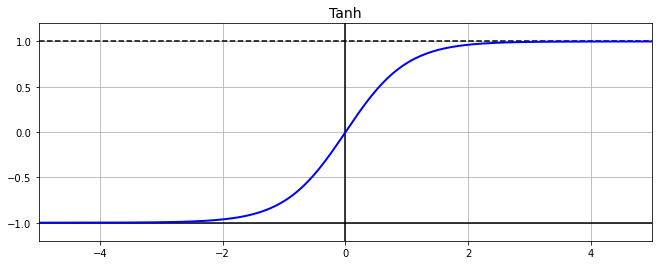

In [2]:
import numpy as np; import matplotlib.pyplot as plt; a = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4)); plt.grid(True); plt.axis([-5, 5, -1.2, 1.2]); 
plt.plot([-5, 5], [-1, -1], 'k-'); plt.plot([-5, 5], [1, 1], 'k--'); plt.plot([0, 0], [-1.2, 1.2], 'k-')
plt.plot(a, np.tanh(a), "b-", linewidth=2); plt.title("Tanh", fontsize=14);

## Funciones no saturantes

**Rectified linear unit (ReLU):** $\qquad\operatorname{ReLU}(a)=\max(a,0)=a\,\mathbb{I}(a>0)\quad$ (muy popular)

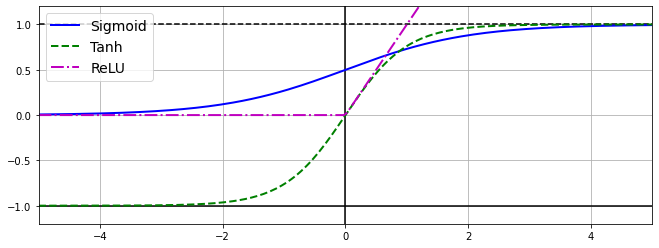

In [3]:
import numpy as np; import matplotlib.pyplot as plt; a = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4)); plt.grid(True); plt.axis([-5, 5, -1.2, 1.2]); 
plt.plot([-5, 5], [-1, -1], 'k-'); plt.plot([-5, 5], [1, 1], 'k--'); plt.plot([0, 0], [-1.2, 1.2], 'k-')
plt.plot(a, 1 / (1 + np.exp(-a)), "b-", linewidth=2, label="Sigmoid")
plt.plot(a, np.tanh(a), "g--", linewidth=2, label="Tanh")
plt.plot(a, np.maximum(a, 0), "m-.", linewidth=2, label="ReLU")
plt.legend(loc="upper left", fontsize=14);

# 13.2.4.1 Ejemplo: [http://playground.tensorflow.org](http://playground.tensorflow.org)

<div align="center"><img src="Figure_13.3.png" width="1000"/></div>

# 13.2.4.2 Ejemplo: MLP para MNIST

**Entrada:** $\;$ imagen de grises $28\times 28$ **aplanada** como vector de $784$ dimensiones

**Capas ocultas:** $\;$ dos capas de $128$ unidades ReLU

**Salida:** $\;$ capa softmax de $10$ salidas

In [3]:
import tensorflow as tf; from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test: loss: {score[0]} - accuracy: {score[1]:.1%}")

Test: loss: 0.07719466090202332 - accuracy: 97.5%


# 13.2.4.3 Ejemplo: MLP para clasificación de texto

**Entrada:** $\;$ secuencia de palabras de longitud variable, $\boldsymbol{v}_1,\ldots,\boldsymbol{v}_T$
* $\boldsymbol{v}_t$ es un vector one-hot de dimensión igual a la talla del vocabulario, $V$
* La secuencia se trata como una bolsa de palabras, $\{\boldsymbol{v}_t\}$

**Capa 1:** $\;$ matriz de embedding $E\times V$, $\mathbf{W}_1$, que convierte cada vector disperso $\boldsymbol{v}_t$ en uno denso $\boldsymbol{e}_t$
$$\boldsymbol{e}_t=\mathbf{W}_1\boldsymbol{v}_t$$

**Capa 2:** $\;$ convierte la entrada en un único vector $E$-dimensional mediante **global average pooling**
$$\bar{\boldsymbol{e}}=\frac{1}{T}\sum\nolimits_{t=1}^T\boldsymbol{e}_t$$

**Resto:** $\;$ MLP con una capa oculta

In [3]:
import numpy as np; import tensorflow as tf; from tensorflow import keras
num_words = 10000; embed_size = 16
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
x_train = keras.preprocessing.sequence.pad_sequences(x_train, value=0, padding="post", maxlen=256)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, value=0, padding="post", maxlen=256)
tf.random.set_seed(42); np.random.seed(42)
model = keras.Sequential([keras.layers.Embedding(num_words, embed_size),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
x_val = x_train[:10000]; x_train = x_train[10000:]
y_val = y_train[:10000]; y_train = y_train[10000:]
model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val), verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test: loss: {score[0]} - accuracy: {score[1]:.1%}")

Test: loss: 0.3790019452571869 - accuracy: 86.7%


# 13.2.4.4a Ejemplo: MLP para regresión (tarea)

**Auto MPG:** $\;$ predicción de consumo en ciudad de un vehículo en miles per gallon (MPG)

**Fuente:**  $\;$ [https://archive.ics.uci.edu/static/public/9/auto+mpg.zip](https://archive.ics.uci.edu/static/public/9/auto+mpg.zip)

In [1]:
import numpy as np; import pandas as pd
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv('auto-mpg.data', sep = '\s+', header = None, names = names, na_values={'horsepower': '?'})
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [2]:
data.drop('car_name', axis=1, inplace=True) # no usamos car_name para predecir
data.dropna(inplace=True) # eliminamos los seis casos sin horsepower 
data = data.astype({'cylinders': np.float64, 'model_year': np.float64, 'origin': 'category'})
data['origin'] = data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,USA
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,Europe
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,USA
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    float64 
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    float64 
 7   origin        392 non-null    category
dtypes: category(1), float64(7)
memory usage: 25.0 KB


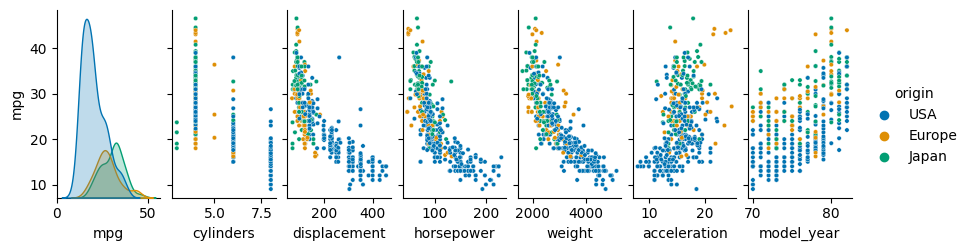

In [4]:
import warnings; warnings.filterwarnings('ignore'); import seaborn as sns
sns.pairplot(data, y_vars='mpg', hue="origin", aspect=.5, palette='colorblind', plot_kws=dict(marker="o", s=10));

# 13.2.4.4b Ejemplo: MLP para regresión (lineal)

**Entrada:** $\;$ vector de $9$ dimensiones, 6 reales y 3 binarias, estandarizado

**Modelo:** $\;$ regresión lineal

In [1]:
import numpy as np; import pandas as pd
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv('auto-mpg.data', sep = '\s+', header = None, names = names, na_values={'horsepower': '?'})
data.drop('car_name', axis=1, inplace=True) # no usamos car_name para predecir
data.dropna(inplace=True) # eliminamos los seis casos sin horsepower 
data = data.astype({'cylinders': np.float64, 'model_year': np.float64, 'origin': 'category'})
data['origin'] = data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = pd.concat([data, pd.get_dummies(data.origin, prefix='', prefix_sep='')], axis=1)
data.drop('origin', axis=1, inplace=True); y = data.pop('mpg'); X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler(); X_train = scaler.fit_transform(X_train); X_test = scaler.transform(X_test);

In [3]:
linreg = LinearRegression().fit(X_train, y_train)
y_train_pred = linreg.predict(X_train); y_test_pred = linreg.predict(X_test)

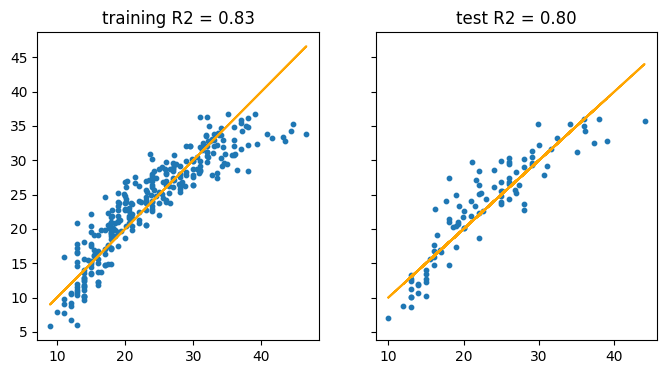

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred); r2_test = r2_score(y_test, y_test_pred)
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey = 'all')
axes[0].set_title(f'training R2 = {r2_train:.2f}')
axes[0].scatter(y_train, y_train_pred, s=10)
axes[0].plot(y_train, y_train, color='orange')
axes[1].set_title(f'test R2 = {r2_test:.2f}')
axes[1].scatter(y_test, y_test_pred, s=10)
axes[1].plot(y_test, y_test, color='orange');

# 13.2.4.4c Ejemplo: MLP para regresión (MLP)

**Entrada:** $\;$ vector de $9$ dimensiones, 6 reales y 3 binarias, estandarizado

**Capas ocultas:** $\;$ dos capas de $64$ unidades ReLU

**Salida:** $\;$ una unidad lineal

In [1]:
import numpy as np; import pandas as pd
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv('auto-mpg.data', sep = '\s+', header = None, names = names, na_values={'horsepower': '?'})
data.drop('car_name', axis=1, inplace=True) # no usamos car_name para predecir
data.dropna(inplace=True) # eliminamos los seis casos sin horsepower 
data = data.astype({'cylinders': np.float64, 'model_year': np.float64, 'origin': 'category'})
data['origin'] = data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = pd.concat([data, pd.get_dummies(data.origin, prefix='', prefix_sep='')], axis=1)
data.drop('origin', axis=1, inplace=True); y = data.pop('mpg'); X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler(); X_train = scaler.fit_transform(X_train); X_test = scaler.transform(X_test);

In [5]:
import tensorflow as tf; from tensorflow import keras
mlp = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)])
mlp.compile(loss='mean_squared_error', optimizer='adam')
mlp.fit(X_train, y_train, epochs=100, verbose=0)
y_train_pred = mlp.predict(X_train); y_test_pred = mlp.predict(X_test)

4/4 [==============================] - 0s 2ms/step


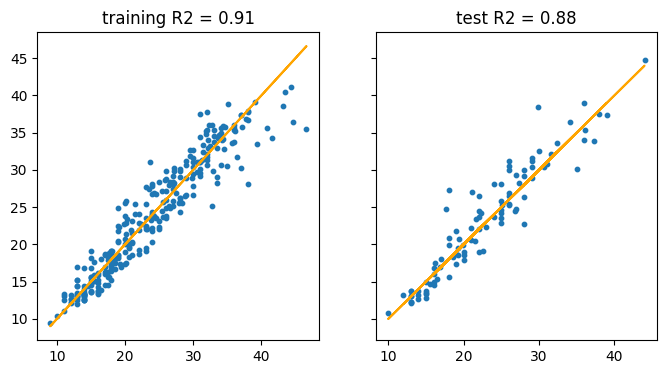

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred); r2_test = r2_score(y_test, y_test_pred)
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey = 'all')
axes[0].set_title(f'training R2 = {r2_train:.2f}')
axes[0].scatter(y_train, y_train_pred, s=10)
axes[0].plot(y_train, y_train, color='orange')
axes[1].set_title(f'test R2 = {r2_test:.2f}')
axes[1].scatter(y_test, y_test_pred, s=10)
axes[1].plot(y_test, y_test, color='orange');

# 13.2.5 La importancia de la profundidad

**No necesidad de más de una capa oculta:** $\;$ un MLP de **una sola capa oculta** con suficientes unidades es una **aproximador de funciones universal** ya que puede aproximar toda función (mínimamente suave) tanto como se quiera

**Importancia de la profundidad:** $\;$ las redes profundas, definidas de manera composicional o jerárquica, suelen ofrecer mejores resultados ya que las últimas capas aprovechan las características aprendidas en las primeras capas

# 13.2.6 La revolución del aprendizaje profundo

**Gran popularidad a partir de los 2010:** $\;$ aunque las ideas básicas tras las DNNs son conocidas durante varias décadas, su gran popularidad llega a partir de los 2010, desde el reconocimiento automático del habla (2011) y la clasificación de imágenes (2012)

**GPUs y grandes conjuntos de datos supervisados:** $\;$ son los principales factores que han contribuido al gran auge de las DNNs

**Librerías de código abierto:** $\;$ las grandes empresas tecnológicas han desarrollado librerías de código abierto que facilitan la aplicación de las DNNs a multitud de problemas; Tensorflow (Google) y PyTorch (Facebook) han sido especialmente populares

# 13.2.7 Conexiones con la biología

**Modelo McCulloch-Pitts:** $\;$ primer modelo computacional de una neurona biológica
* $h_k\in\{0,1\}$ denota el estado, activo o no, de una neurona $k$
* $h_k$ depende de las entradas de la neurona, $\boldsymbol{x}\in\mathbb{R}^D$
* $h_k$ también depende de la fuerza de sus conexiones de entrada correspondientes, $\boldsymbol{w}_k\in\mathbb{R}^D$
* Si la actividad (total) de entrada, $a_k=\boldsymbol{w}_k^t\boldsymbol{x}$, supera cierto umbral de activación $b_k$, la neurona se activa
$$h_k(\boldsymbol{x})=H(\boldsymbol{h}_k^t\boldsymbol{x}-b_k)$$

<div align="center"><img src="Figure_13.10.png" width="800"/></div>

**Diferencias entre redes neuronales artificiales y biológicas:**
* Las artificiales suelen modificar la fuerza de sus conexiones de entrada con retropropagación, cosa imposible en las biológicas pues no pueden enviar información hacia atrás por los axones
* Las artificiales suelen ser hacia adelante, pero las biológicas tienen numerosas conexiones de retroalimentación
* Las artificiales suelen usar neuronas simples, que aplican una función no-lineal sencilla a una suma ponderada, mientras que las biológicas tienen estructuras dendríticas complejas
* Las artificiales son mucho más pequeñas que las biológicas
* Las artificiales se diseñan para modelar una única tarea, mientras que las biológicas implementan múltiples tareas

**Las redes y "el problema de la IA":** $\;$ no se sabe si modelos más realistas del cerebro pueden resolver mejor "el problema de la IA"

**Número de neuronas de las redes artificiales desde los años 1950 y comparación con el de algunos seres vivos:**
* Modelo 1: Perceptrón de Rosenblatt (1958)
* Modelo 2: ADALINE de Widrow y Hoff (1960)
* Modelo 3: Neocognitron de Fukushima (1980)
* Modelo 4: MLP de Rumelhart, Hinton y Williams (1986)

<div align="center"><img src="Figure_13.11.png"/></div>